In [6]:
import cv2
import numpy as np
from superpoint.datasets.synthetic_shapes import SyntheticShapes
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
config = {
    'primitives': 'all',
    'on-the-fly': True,
    'preprocessing': {
        'resize': [240, 320],
        'blur_size': 11,
    }
}
dataset = SyntheticShapes(**config)
data = dataset.get_test_set()

In [3]:
def harris(img):
    return cv2.cornerHarris(img, 4, 3, 0.04)
def shi(img):
    detections = np.zeros_like(img, np.float)
    thresh = np.linspace(0.0001, 1, 100, endpoint=False)
    for t in thresh:
        corners = cv2.goodFeaturesToTrack(img, 100, t, 5)
        if corners is not None:
            corners = corners.astype(np.int)
            detections[(corners[:, 0, 1], corners[:, 0, 0])] = t
    return detections
def fast(img):
    detector = cv2.FastFeatureDetector_create(10)
    corners = detector.detect(img)
    detections = np.zeros_like(img, np.float)
    for c in corners:
        detections[tuple(np.flip(np.int0(c.pt),0))] = c.response
    return detections

In [4]:
def disp(img):
    img = cv2.dilate(img, None)
    return img/np.max(img)

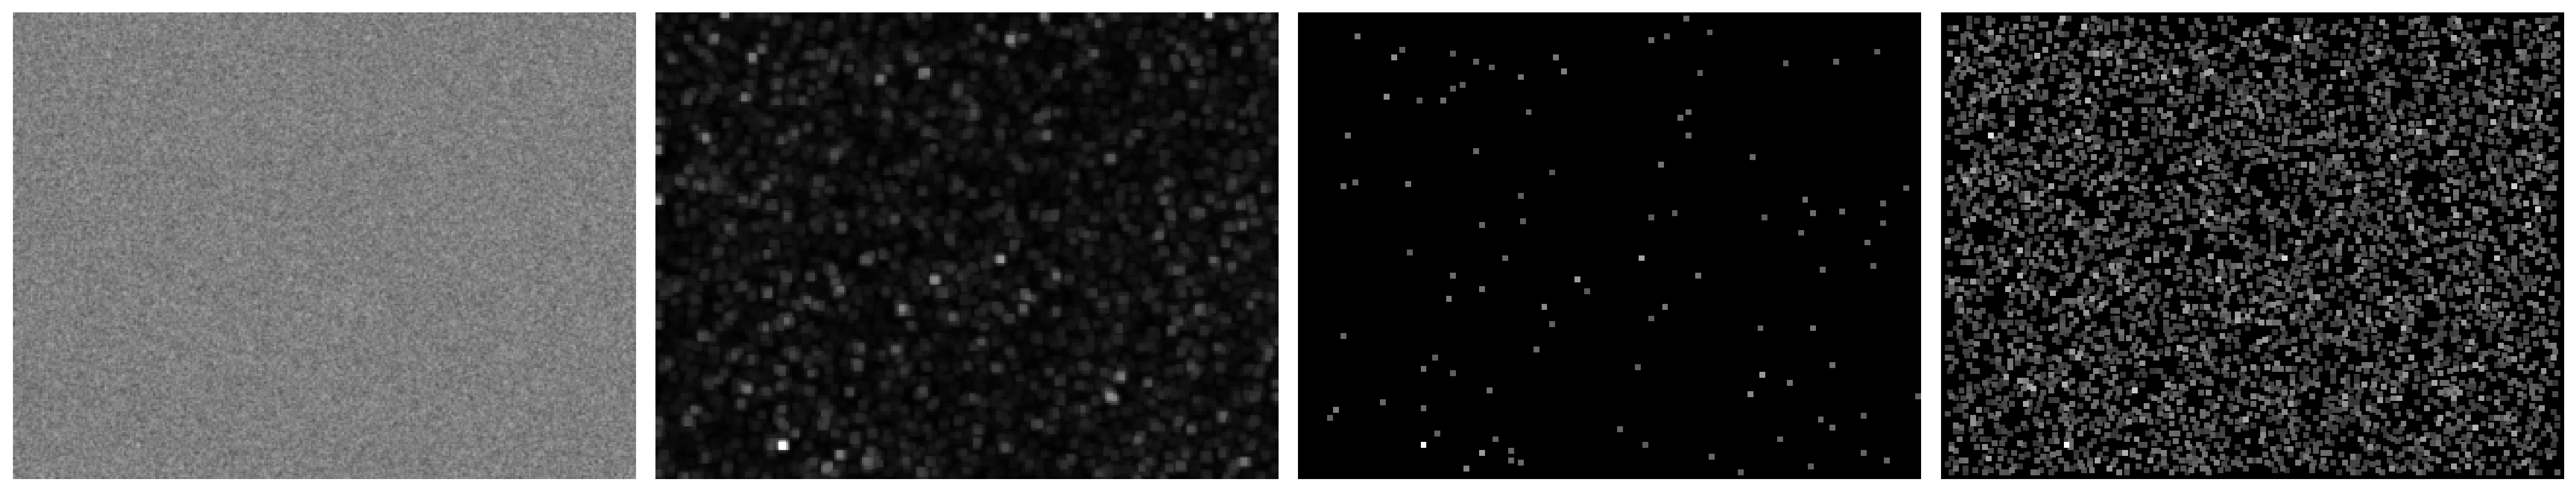

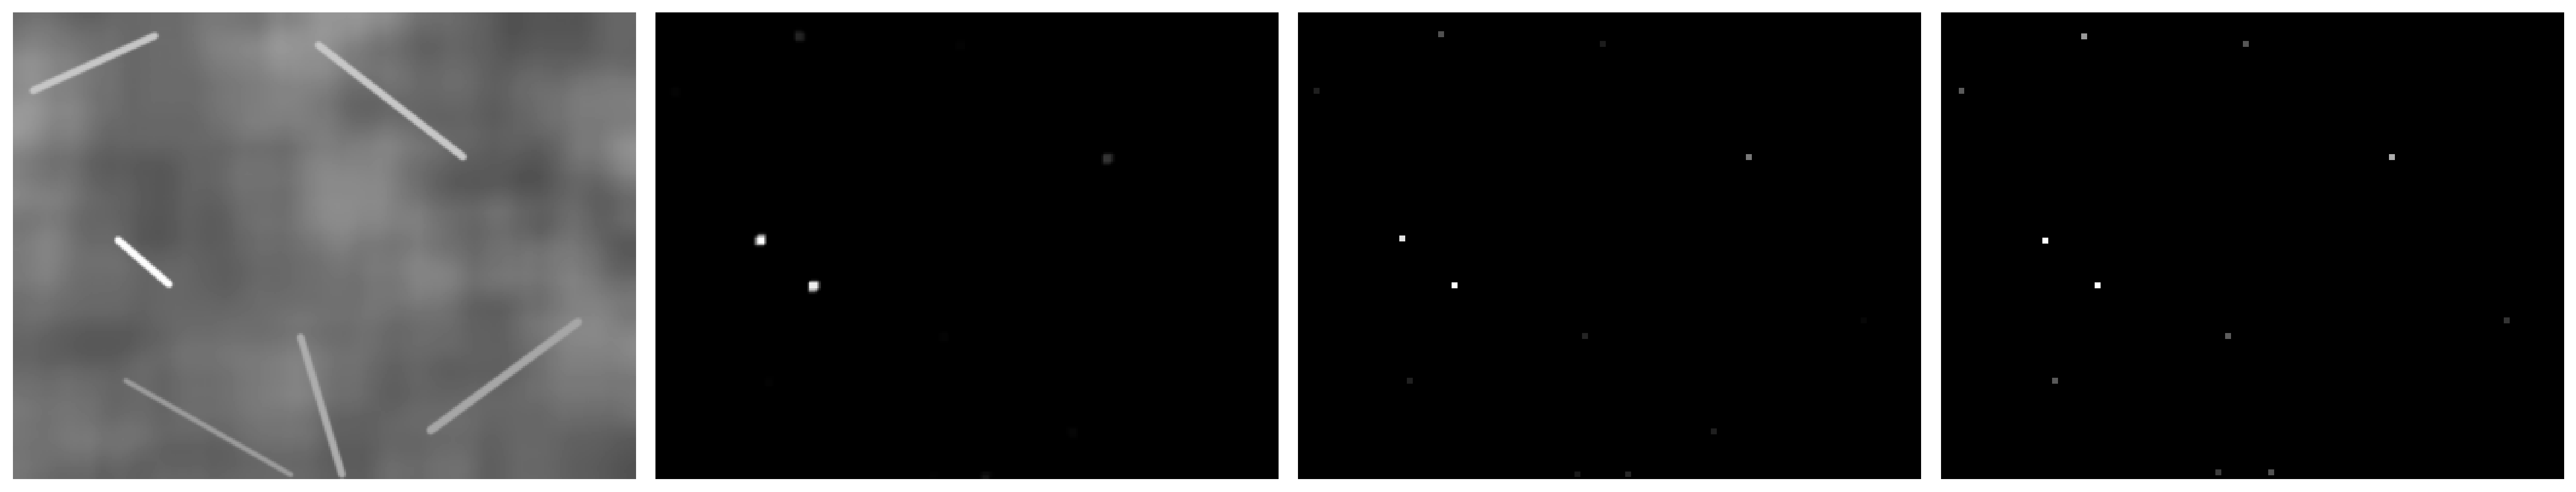

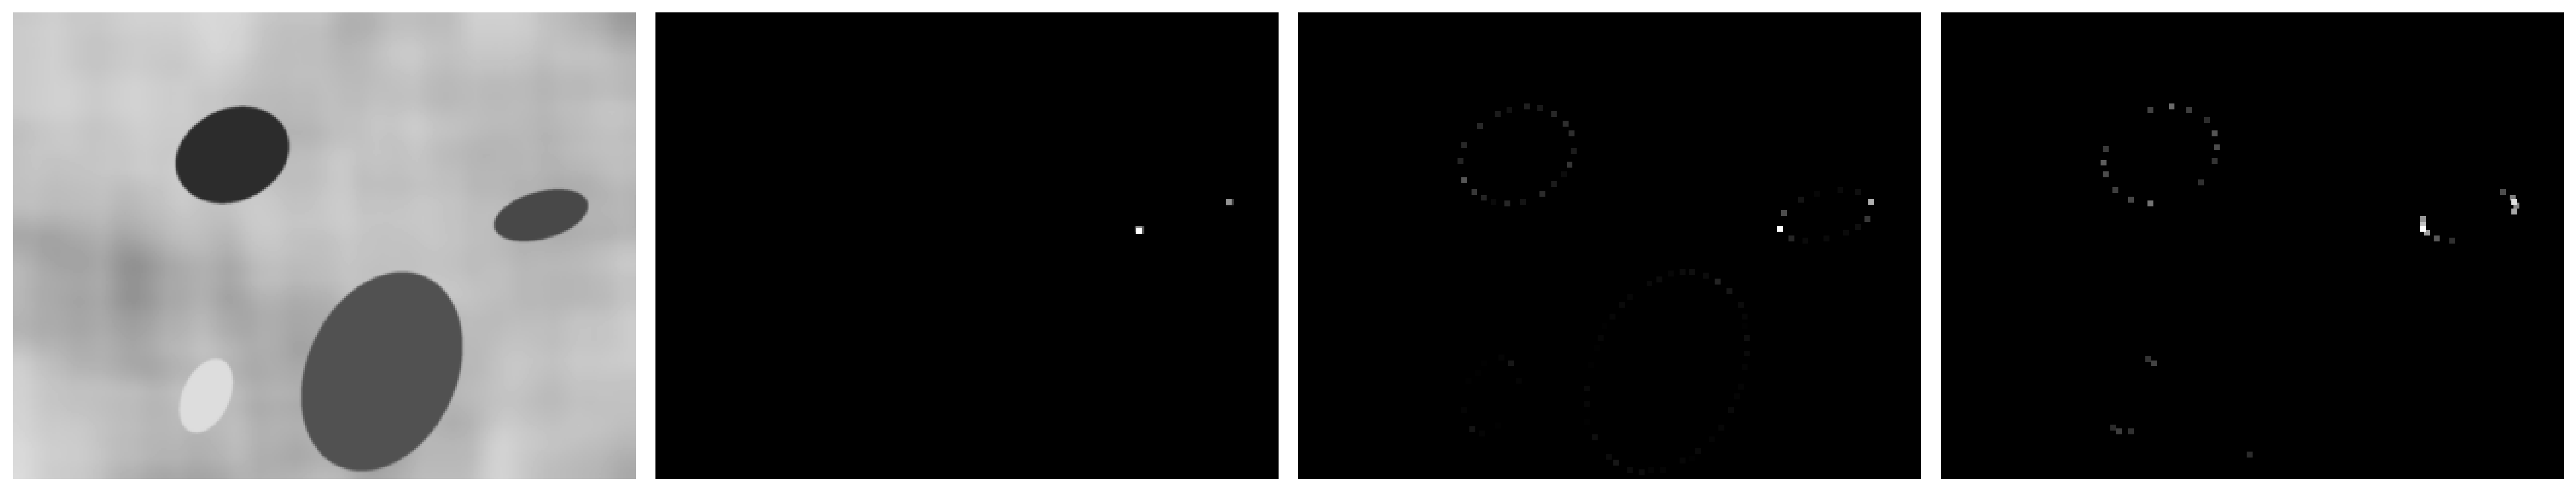

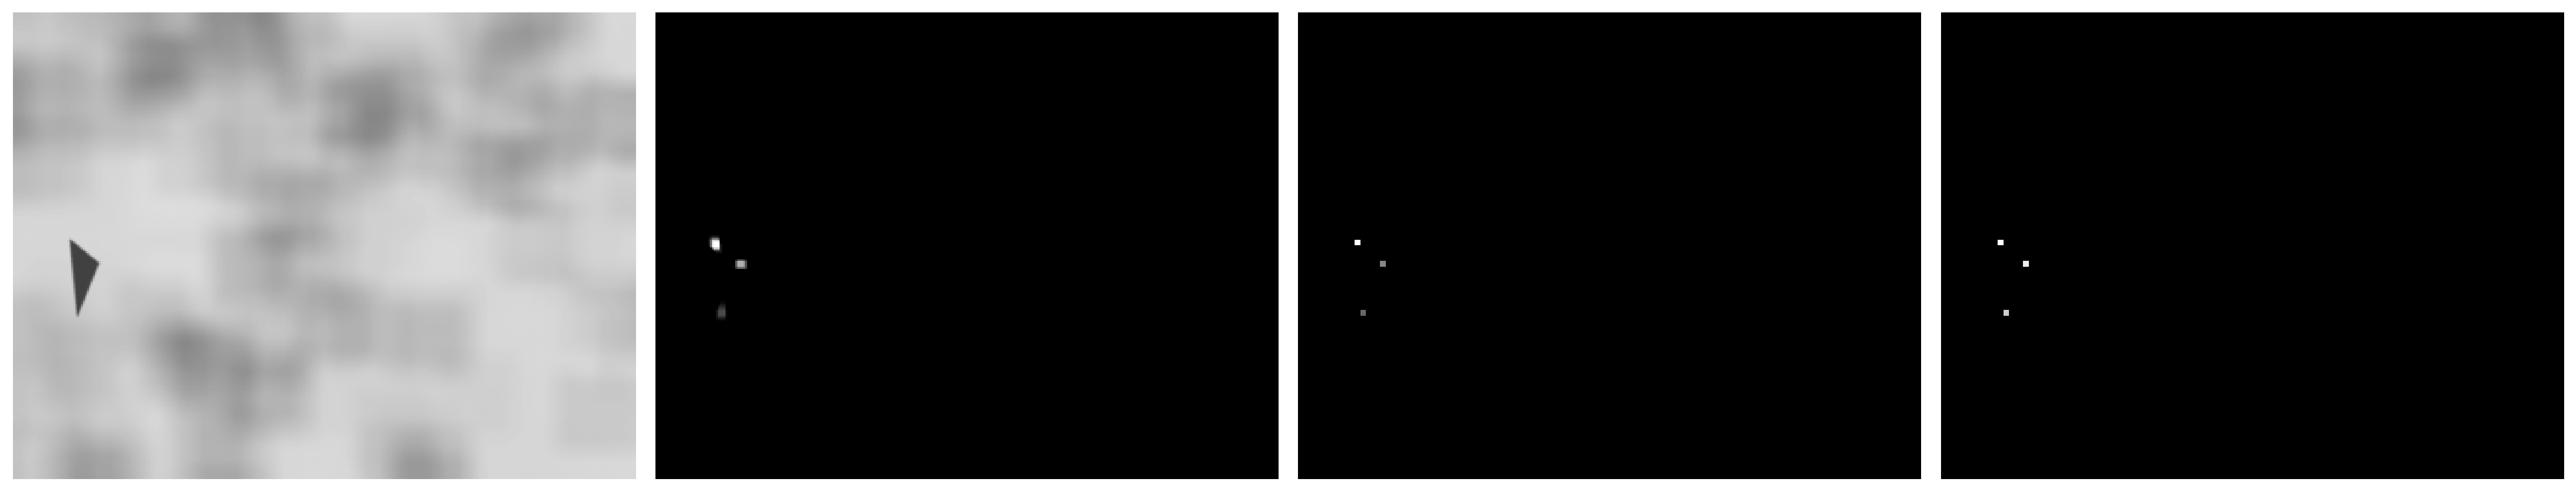

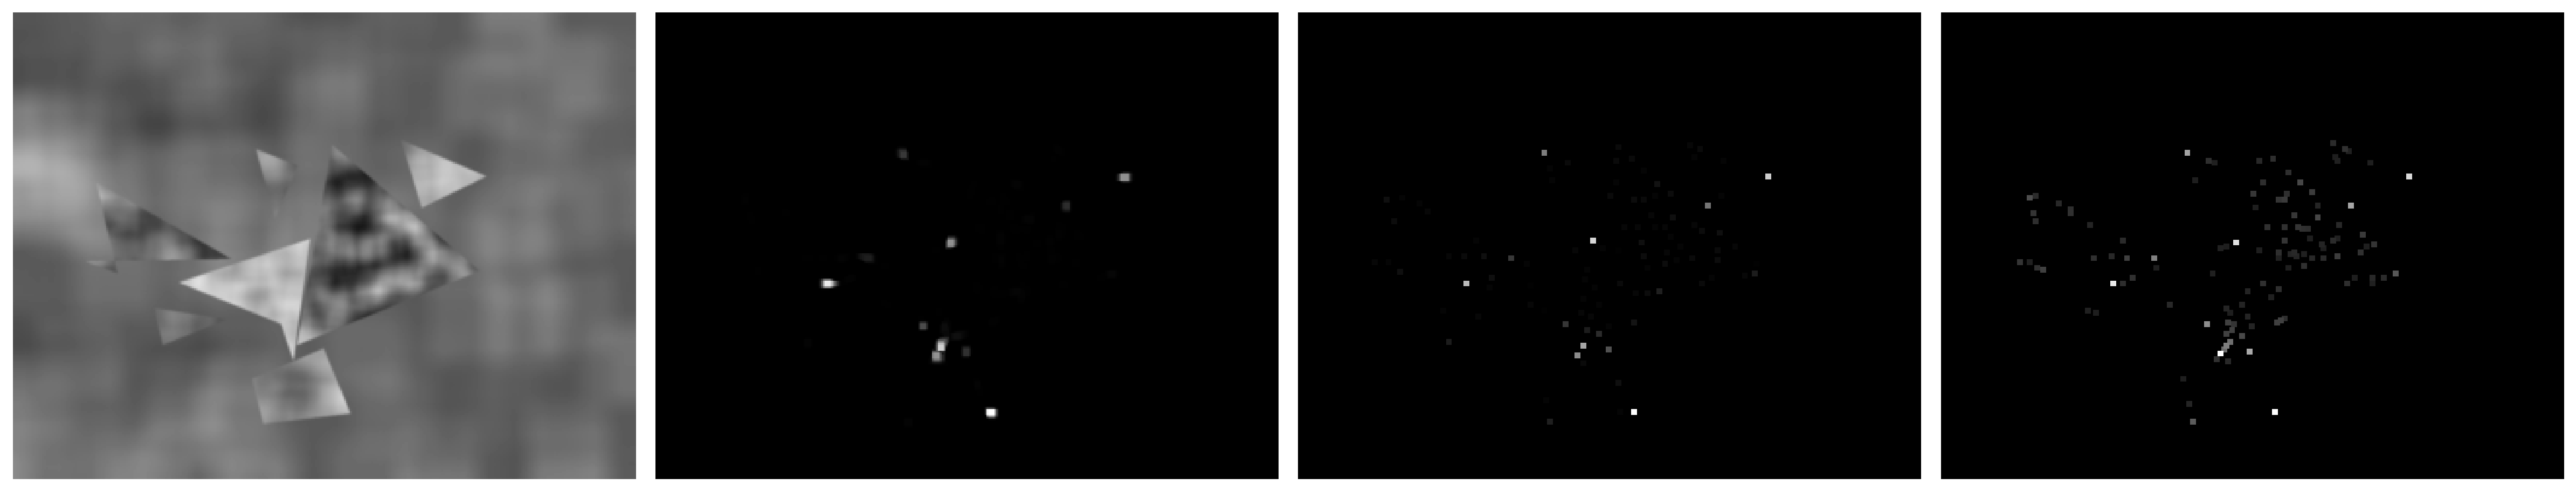

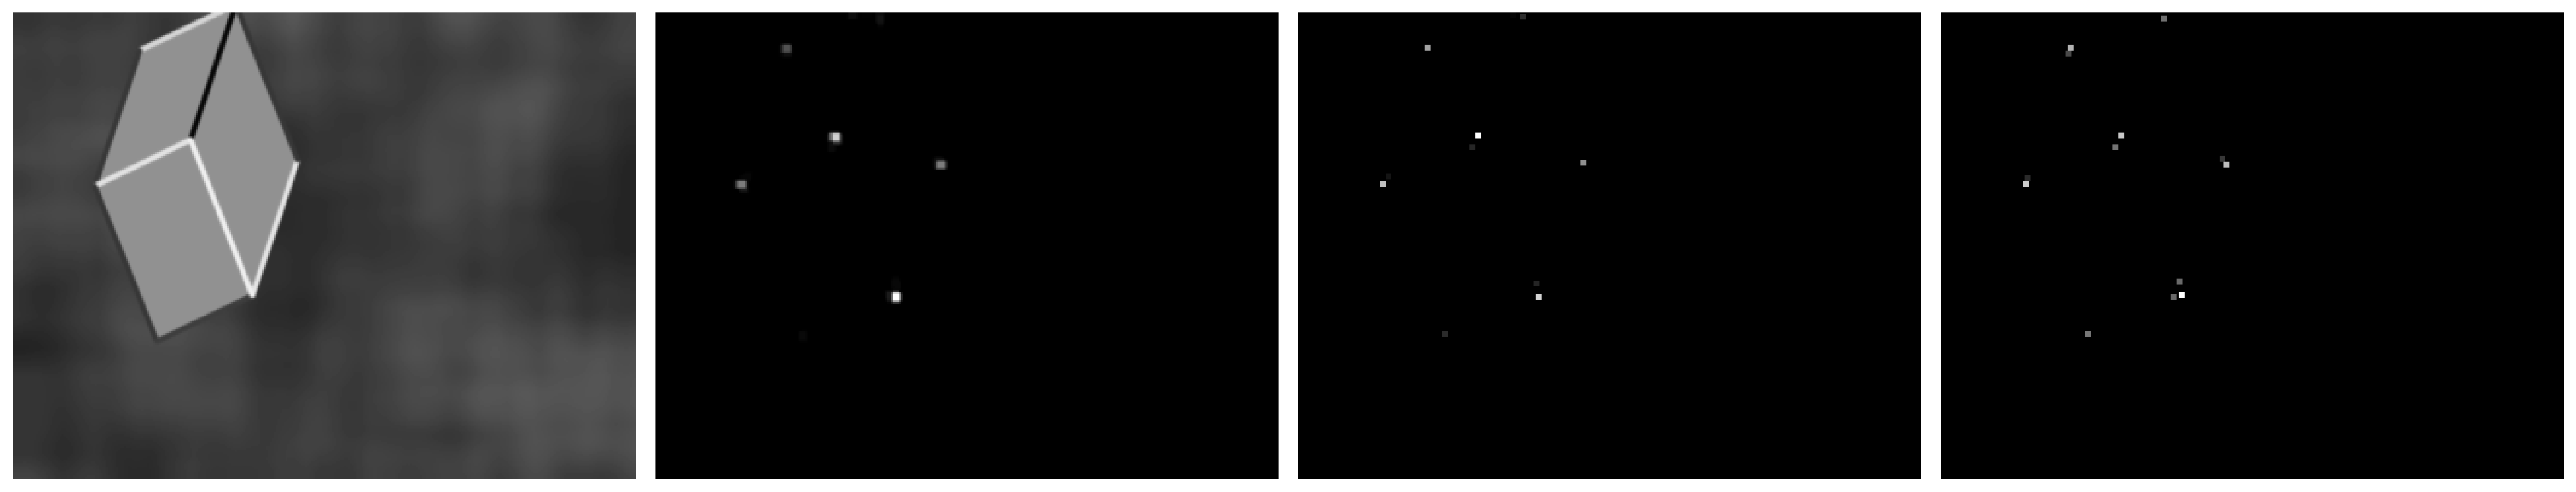

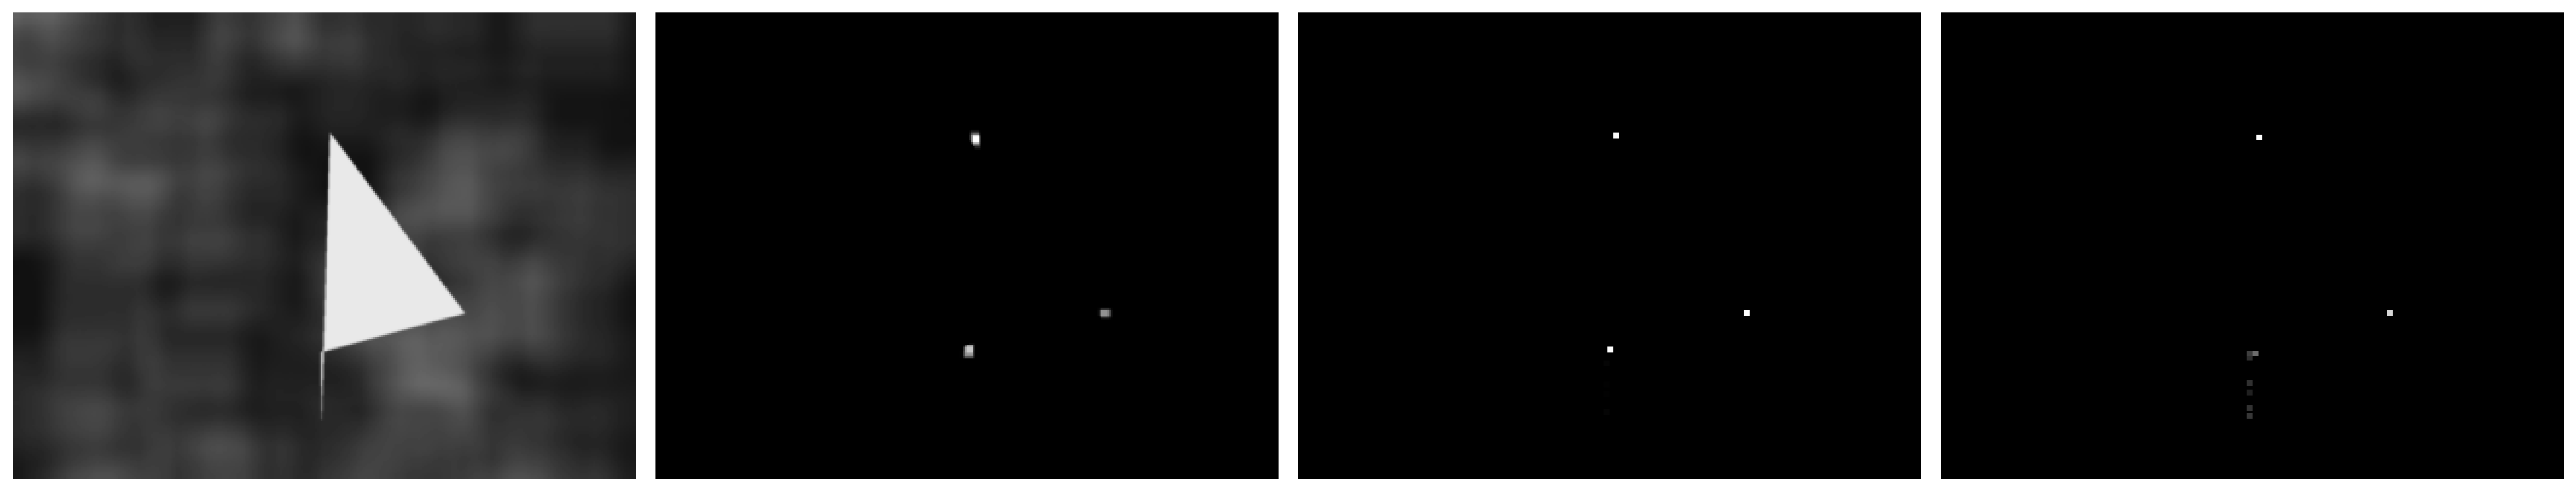

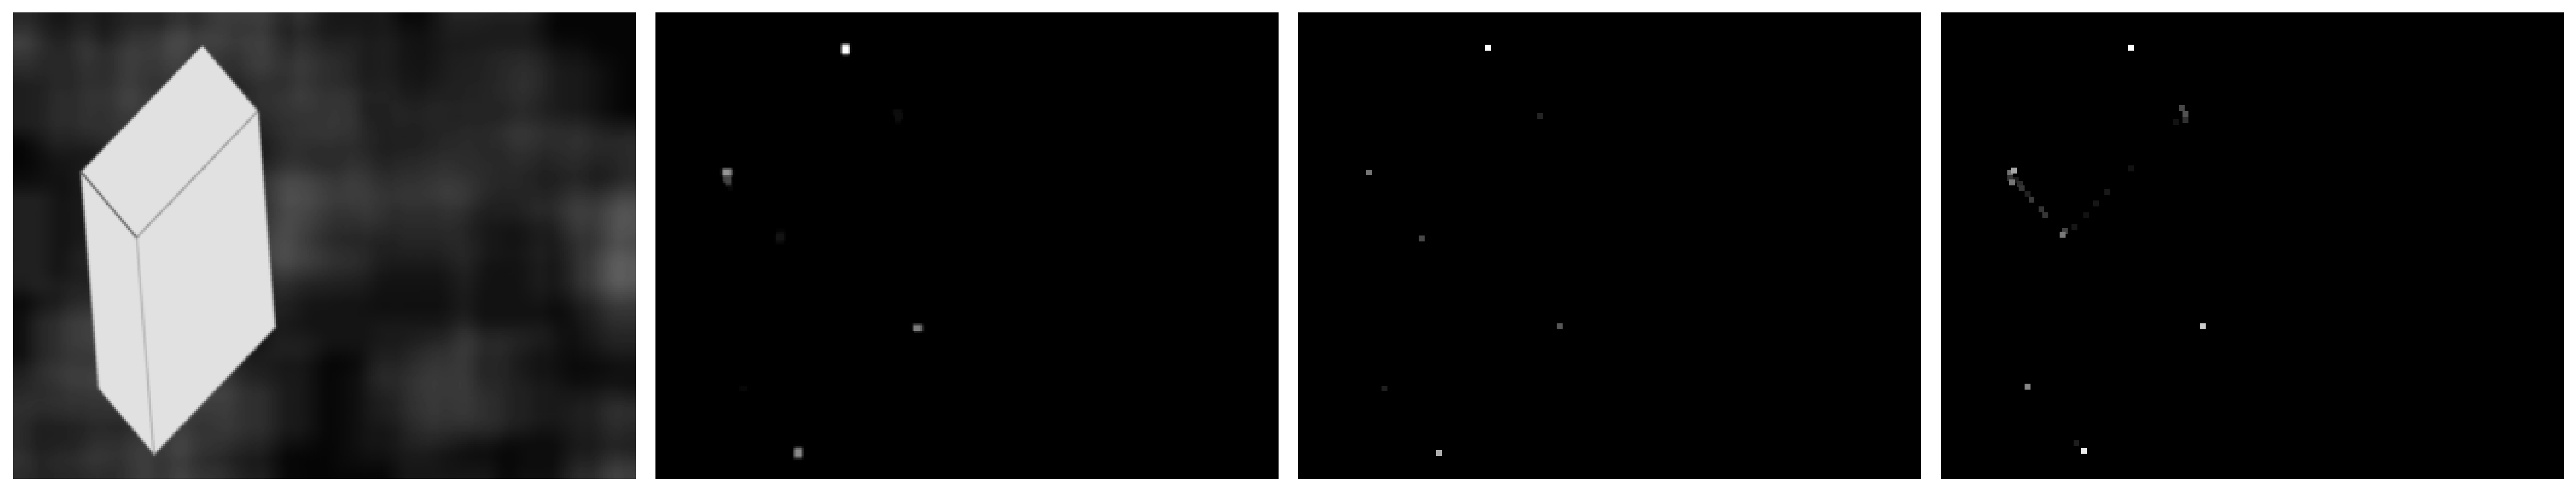

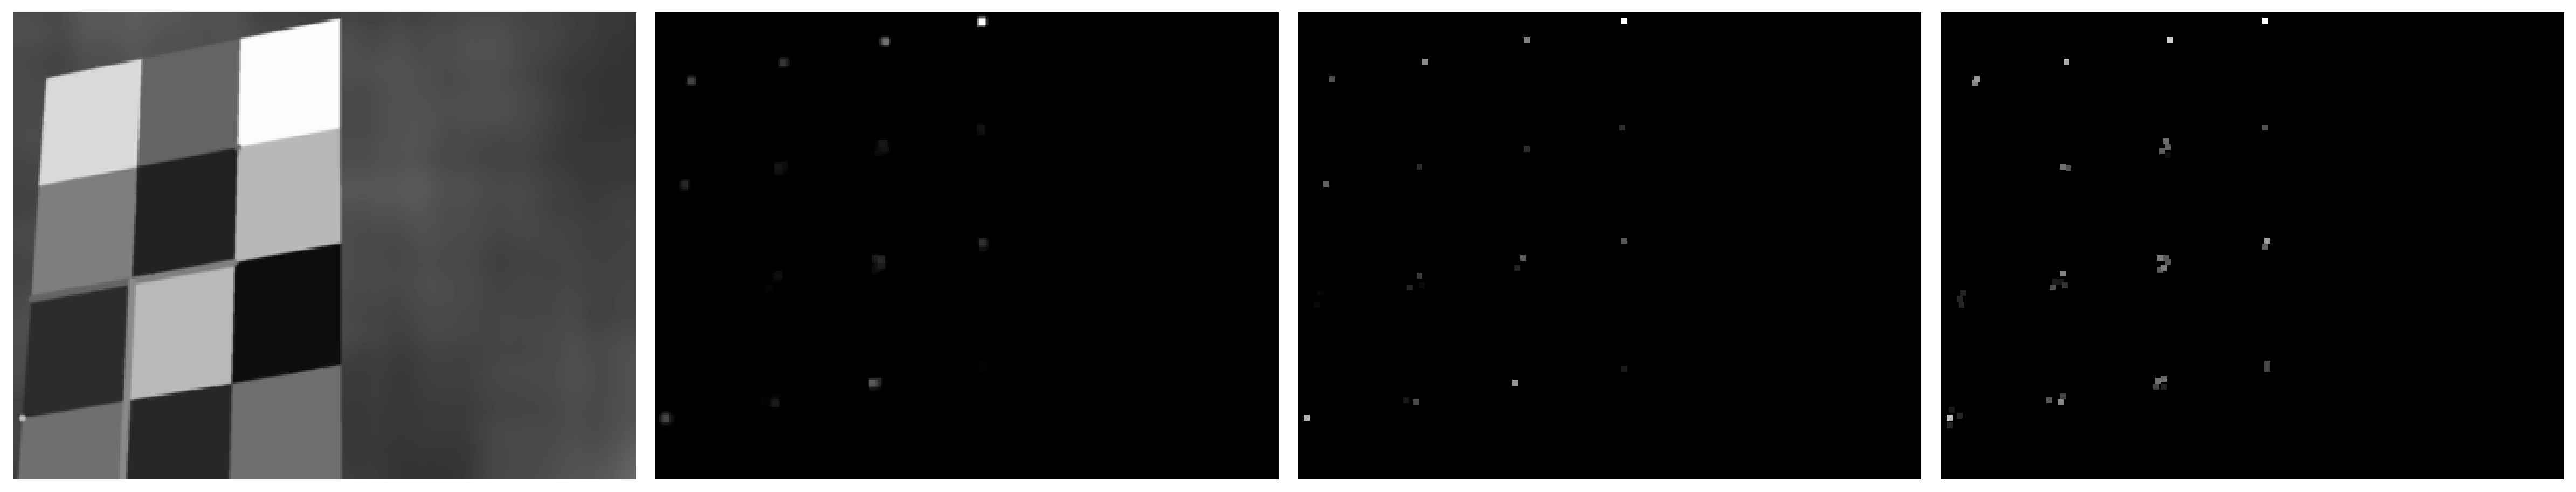

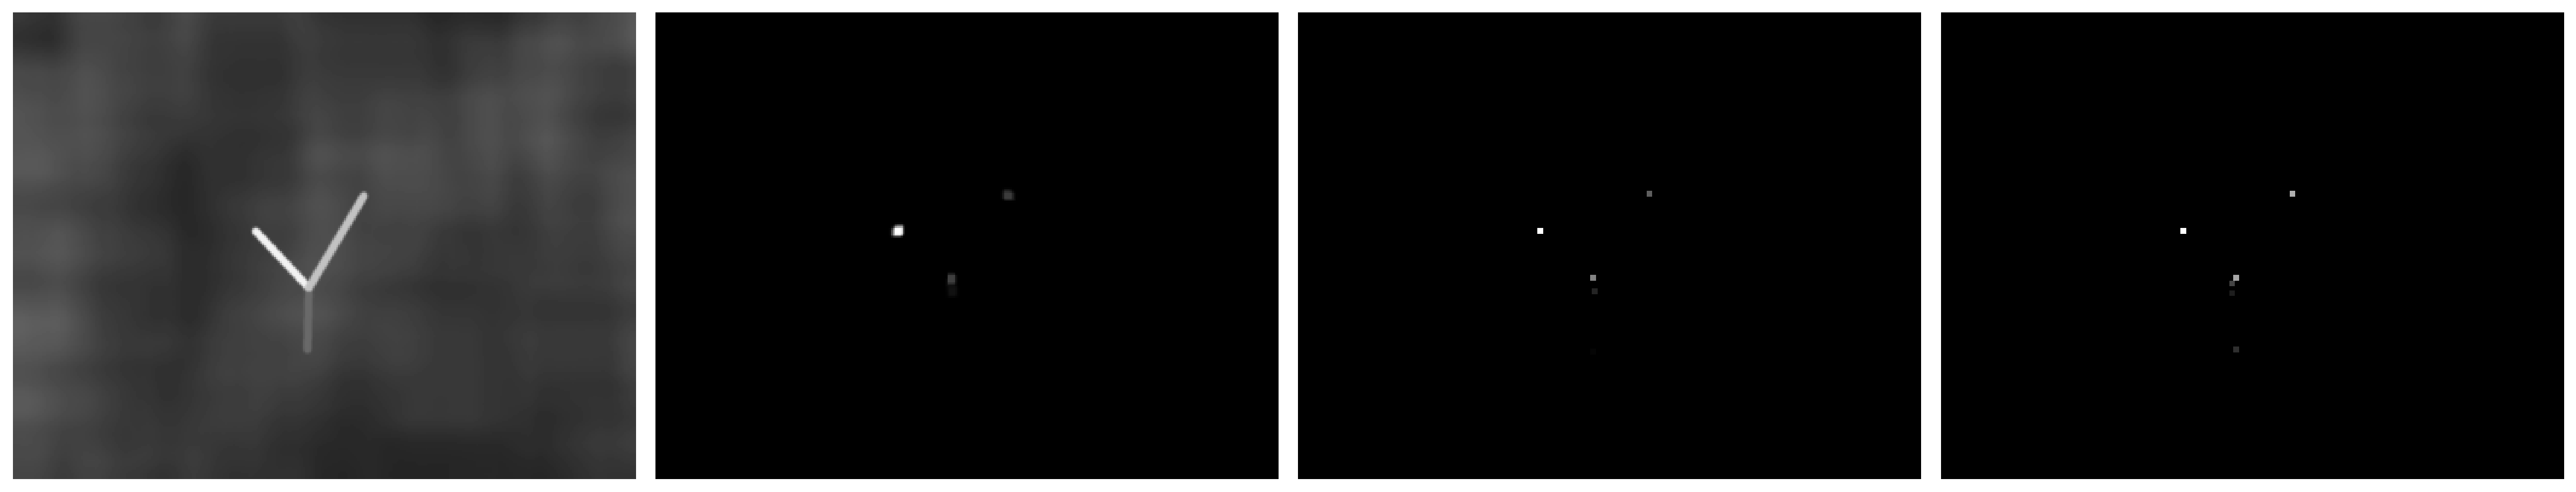

In [5]:
for i in range(10):
    d = next(data)
    im = d['image'][..., 0].astype(np.uint8)
    plot_imgs([im/255., disp(harris(im)), disp(shi(im)), disp(fast(im))], cmap='gray', dpi=200)